In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [2]:
file_path = 'headlines/1970-1.csv'
data = pd.read_csv(file_path)

In [3]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/khanhdo/nltk_data...


In [4]:
def analyze_sentiment(text):
    sentiment = sid.polarity_scores(text)
    return sentiment['compound']

In [9]:
data['lead_paragraph_sentiment'] = data['lead_paragraph'].apply(lambda x: analyze_sentiment(str(x)) if isinstance(x, float) else analyze_sentiment(x))
data['headline_sentiment'] = data['headline'].apply(analyze_sentiment)

In [10]:
data.head()

,headline,date,web_url,doc_type,lead_paragraph,material_type,author,section,subsection,keywords,headline_sentiment,lead_paragraph_sentiment
0,Hail and Farewell,1970-01-01,https://www.nytimes.com/1970/01/01/archives/ha...,article,It is hard to believe that popular prophets at...,Archives,NaN,Archives,NaN,['Vietnam'],0.0772,0.5789
1,In The Nation: The Devil and Dean Rusk,1970-01-01,https://www.nytimes.com/1970/01/01/archives/in...,article,"WASHINGTON, Dec.31—The old year, going its unm...",Archives,By Tom Wicker,Archives,NaN,['Vietnam'],-0.6597,0.8074
2,YIPPIE DENIES BID TO KIDNAP OFFICER,1970-01-01,https://www.nytimes.com/1970/01/01/archives/yi...,article,"CHICAGO, Dec. 31—Despite vigorous protests by ...",Archives,By J. Anthony Lukas Special to The New York Times,Archives,NaN,['Vietnam'],-0.4215,-0.2023
3,THIEU VICTORIOUS AS HOUSE SCORES 3,1970-01-01,https://www.nytimes.com/1970/01/01/archives/th...,article,"SAIGON, South Vietnam, Dec. 31—After two days ...",Archives,By Terence Smith Special to The New York Times,Archives,NaN,['Vietnam'],0.0000,0.4019
4,Press Institute Calls Criticism by Agnew Major...,1970-01-01,https://www.nytimes.com/1970/01/01/archives/pr...,article,"GENEVA, Dec. 31—Vice President Agnew's attacks...",Archives,NaN,Archives,NaN,"['Vietnam', 'Vietnam']",-0.7430,-0.3400


Text(0, 0.5, 'Frequency')

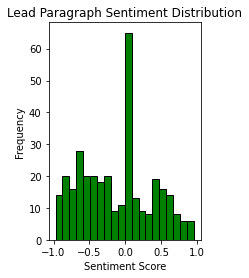

In [13]:
plt.subplot(1, 2, 2)
plt.hist(data['lead_paragraph_sentiment'], bins=20, color='green', edgecolor='black')
plt.title('Lead Paragraph Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

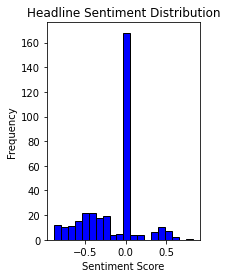

In [12]:
plt.subplot(1, 2, 1)
plt.hist(data['headline_sentiment'], bins=20, color='blue', edgecolor='black')
plt.title('Headline Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')


In [15]:
data['date'] = pd.to_datetime(data['date'])

sentiment_by_date = data.groupby('date').agg({
    'headline_sentiment': 'mean',
    'lead_paragraph_sentiment': 'mean'
}).reset_index()

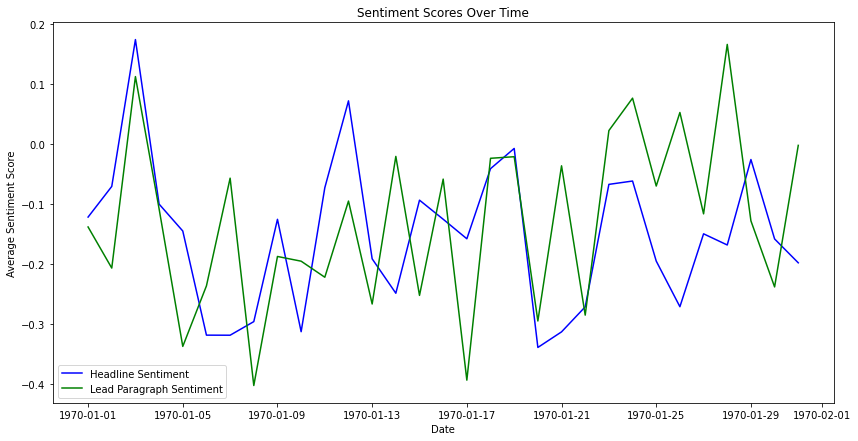

In [16]:
plt.figure(figsize=(14, 7))

# Headline sentiment over time
plt.plot(sentiment_by_date['date'], sentiment_by_date['headline_sentiment'], label='Headline Sentiment', color='blue')

# Lead paragraph sentiment over time
plt.plot(sentiment_by_date['date'], sentiment_by_date['lead_paragraph_sentiment'], label='Lead Paragraph Sentiment', color='green')

plt.title('Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.show()